<h1 align="center"> CSE 142 Assignment 4, Fall 2023

<h2 align="center"> 4 Questions, 100 pts, due: 23:59 pm, Nov 22th, 2023
    
    Your name: Airi Kokuryo         Student ID: 2086695

## Instruction 

- Submit your assignments onto **Gradescope** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file, please **rename this file with your name included**.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    **For assignment related questions, please reach TA or grader through Slack/Piazza/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** EM algorithm (Mathematical Derivation) - **Optional Exercise**
- **Task 2:** K-Means implementation (Coding)
- **Task 3:** Kernel Methods with Noisy Setting (Coding)


# Question 1. (Bonus OPTIONAL) EM algorithm, 20 pts 

Derive the E-step and M-step update equations of EM algorithm for estimating the Gaussian mixture model $p(X;\theta) = ∑_{k=1}^{K} \pi_k N(x; \mu_k, \sigma_k^2)$ where $\pi_k$ is the mixture weight with $\pi_k \ge 0$  and  $∑_{k=1}^{K} \pi_k = 1$, and $\mu_k$, $\sigma^2_k$ are the mean and variance of the gaussian distribution corresponding to cluster k. 

For the E-step, first prove that $z_{ik} = \color{yellow}{P(z_i = k | X, \mu ,\sigma, \pi)} = \dfrac {\pi_k N(x_i; \mu_k, \sigma_k^2)}{∑_{k=1}^{K} \pi_k N(x_i; \mu_k, \sigma_k^2)}$. Then, for the M-step, show the derivation to compute the updates for $(\mu_k, \pi_k)$. Note that, you don't need to show the derivation for $\sigma_k$. For each derivation step, mention the concept applied (e.g. just 2-3 keywords, e.g. formula for expectation, independence of datapoints, (f+g)' = f' + g', etc ... ). 

**Hint:** For the M-step, you need to solve for $\color{yellow}\mu_k^t = \underset{\mu_k}{argmax} \ E_{p(Z | X, \mu^{(t-1)}, \sigma^{(t-1)}, \pi^{(t-1)})}{[\log p(X, Z | \mu, \sigma, \pi)]}$ (and similarly for $\pi_k$) by applying the first order conditions for function optimization (take derivative and set it to zero). Note that the term $\color{yellow}{p(Z|X,\mu^{(t-1)},\sigma^{(t-1)},\pi^{(t-1)})}$ is the one computed in the E-step, and uses fixed values for $\mu, \sigma, \pi$ from the previous iteration (t-1).

**This exercise is optional, any effort will be rewarded with extra points on the assignment as a whole!**






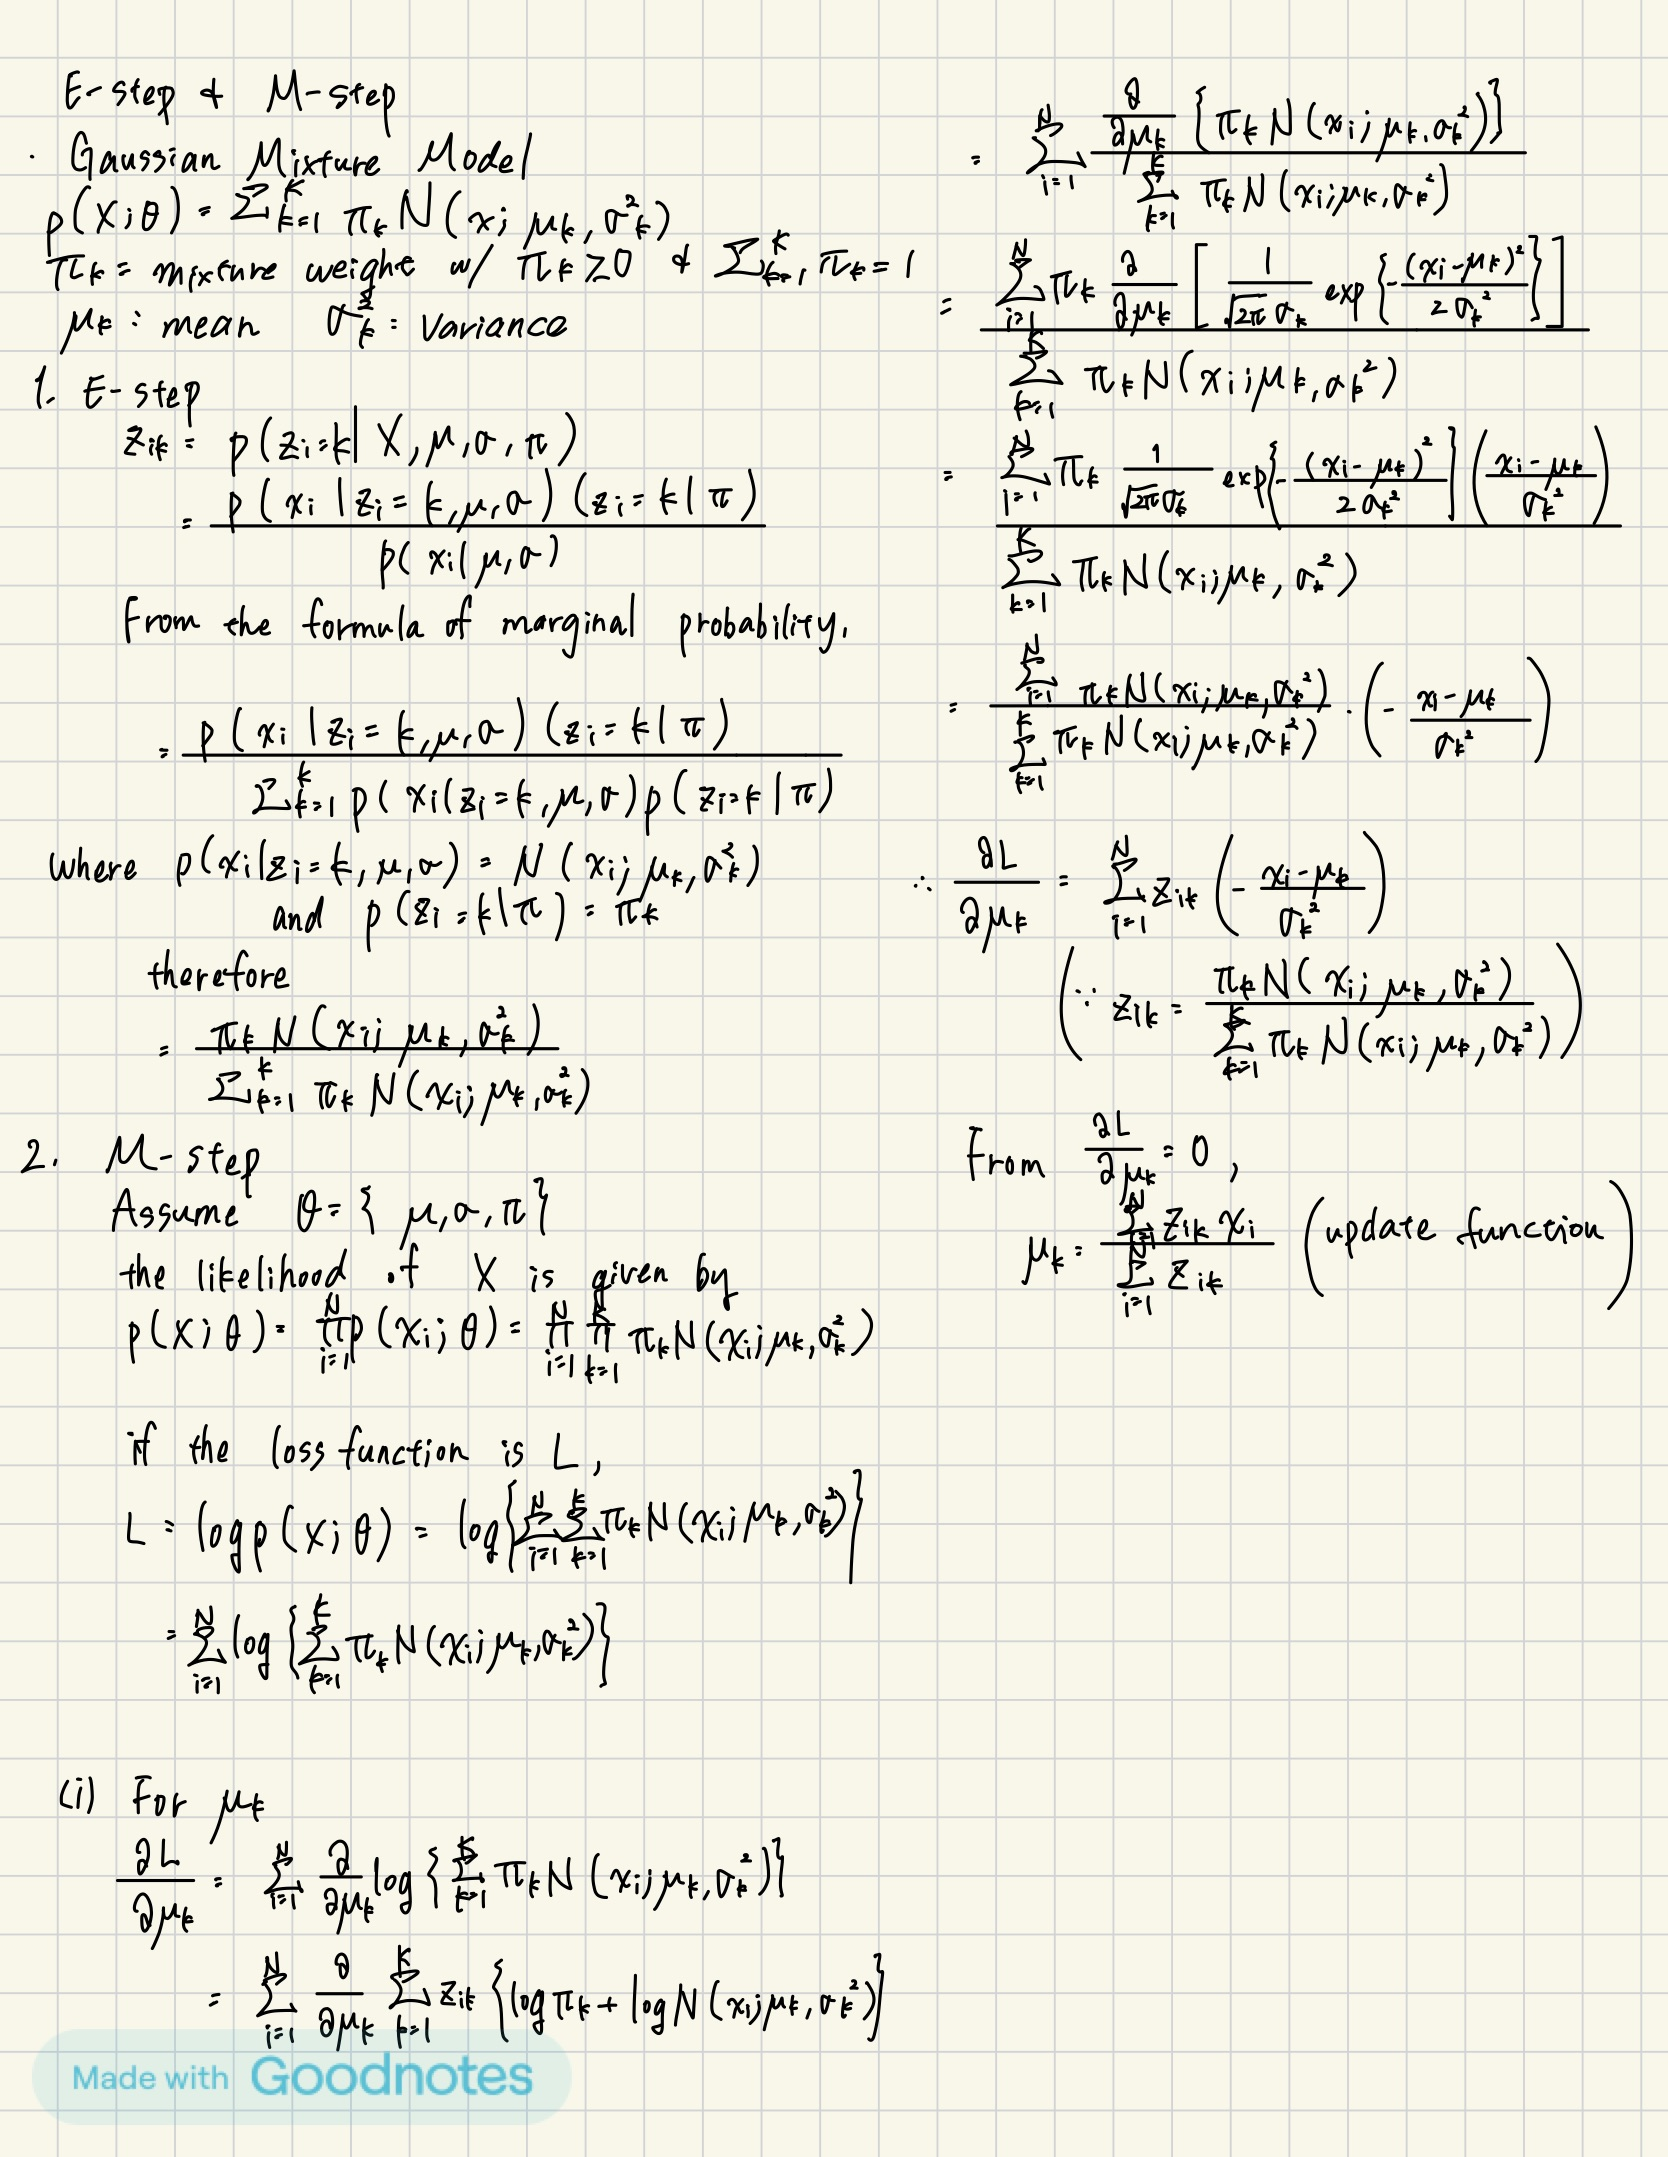

In [11]:
from IPython.display import Image
# Replace the figure name
Image(filename='question1_1.jpg')

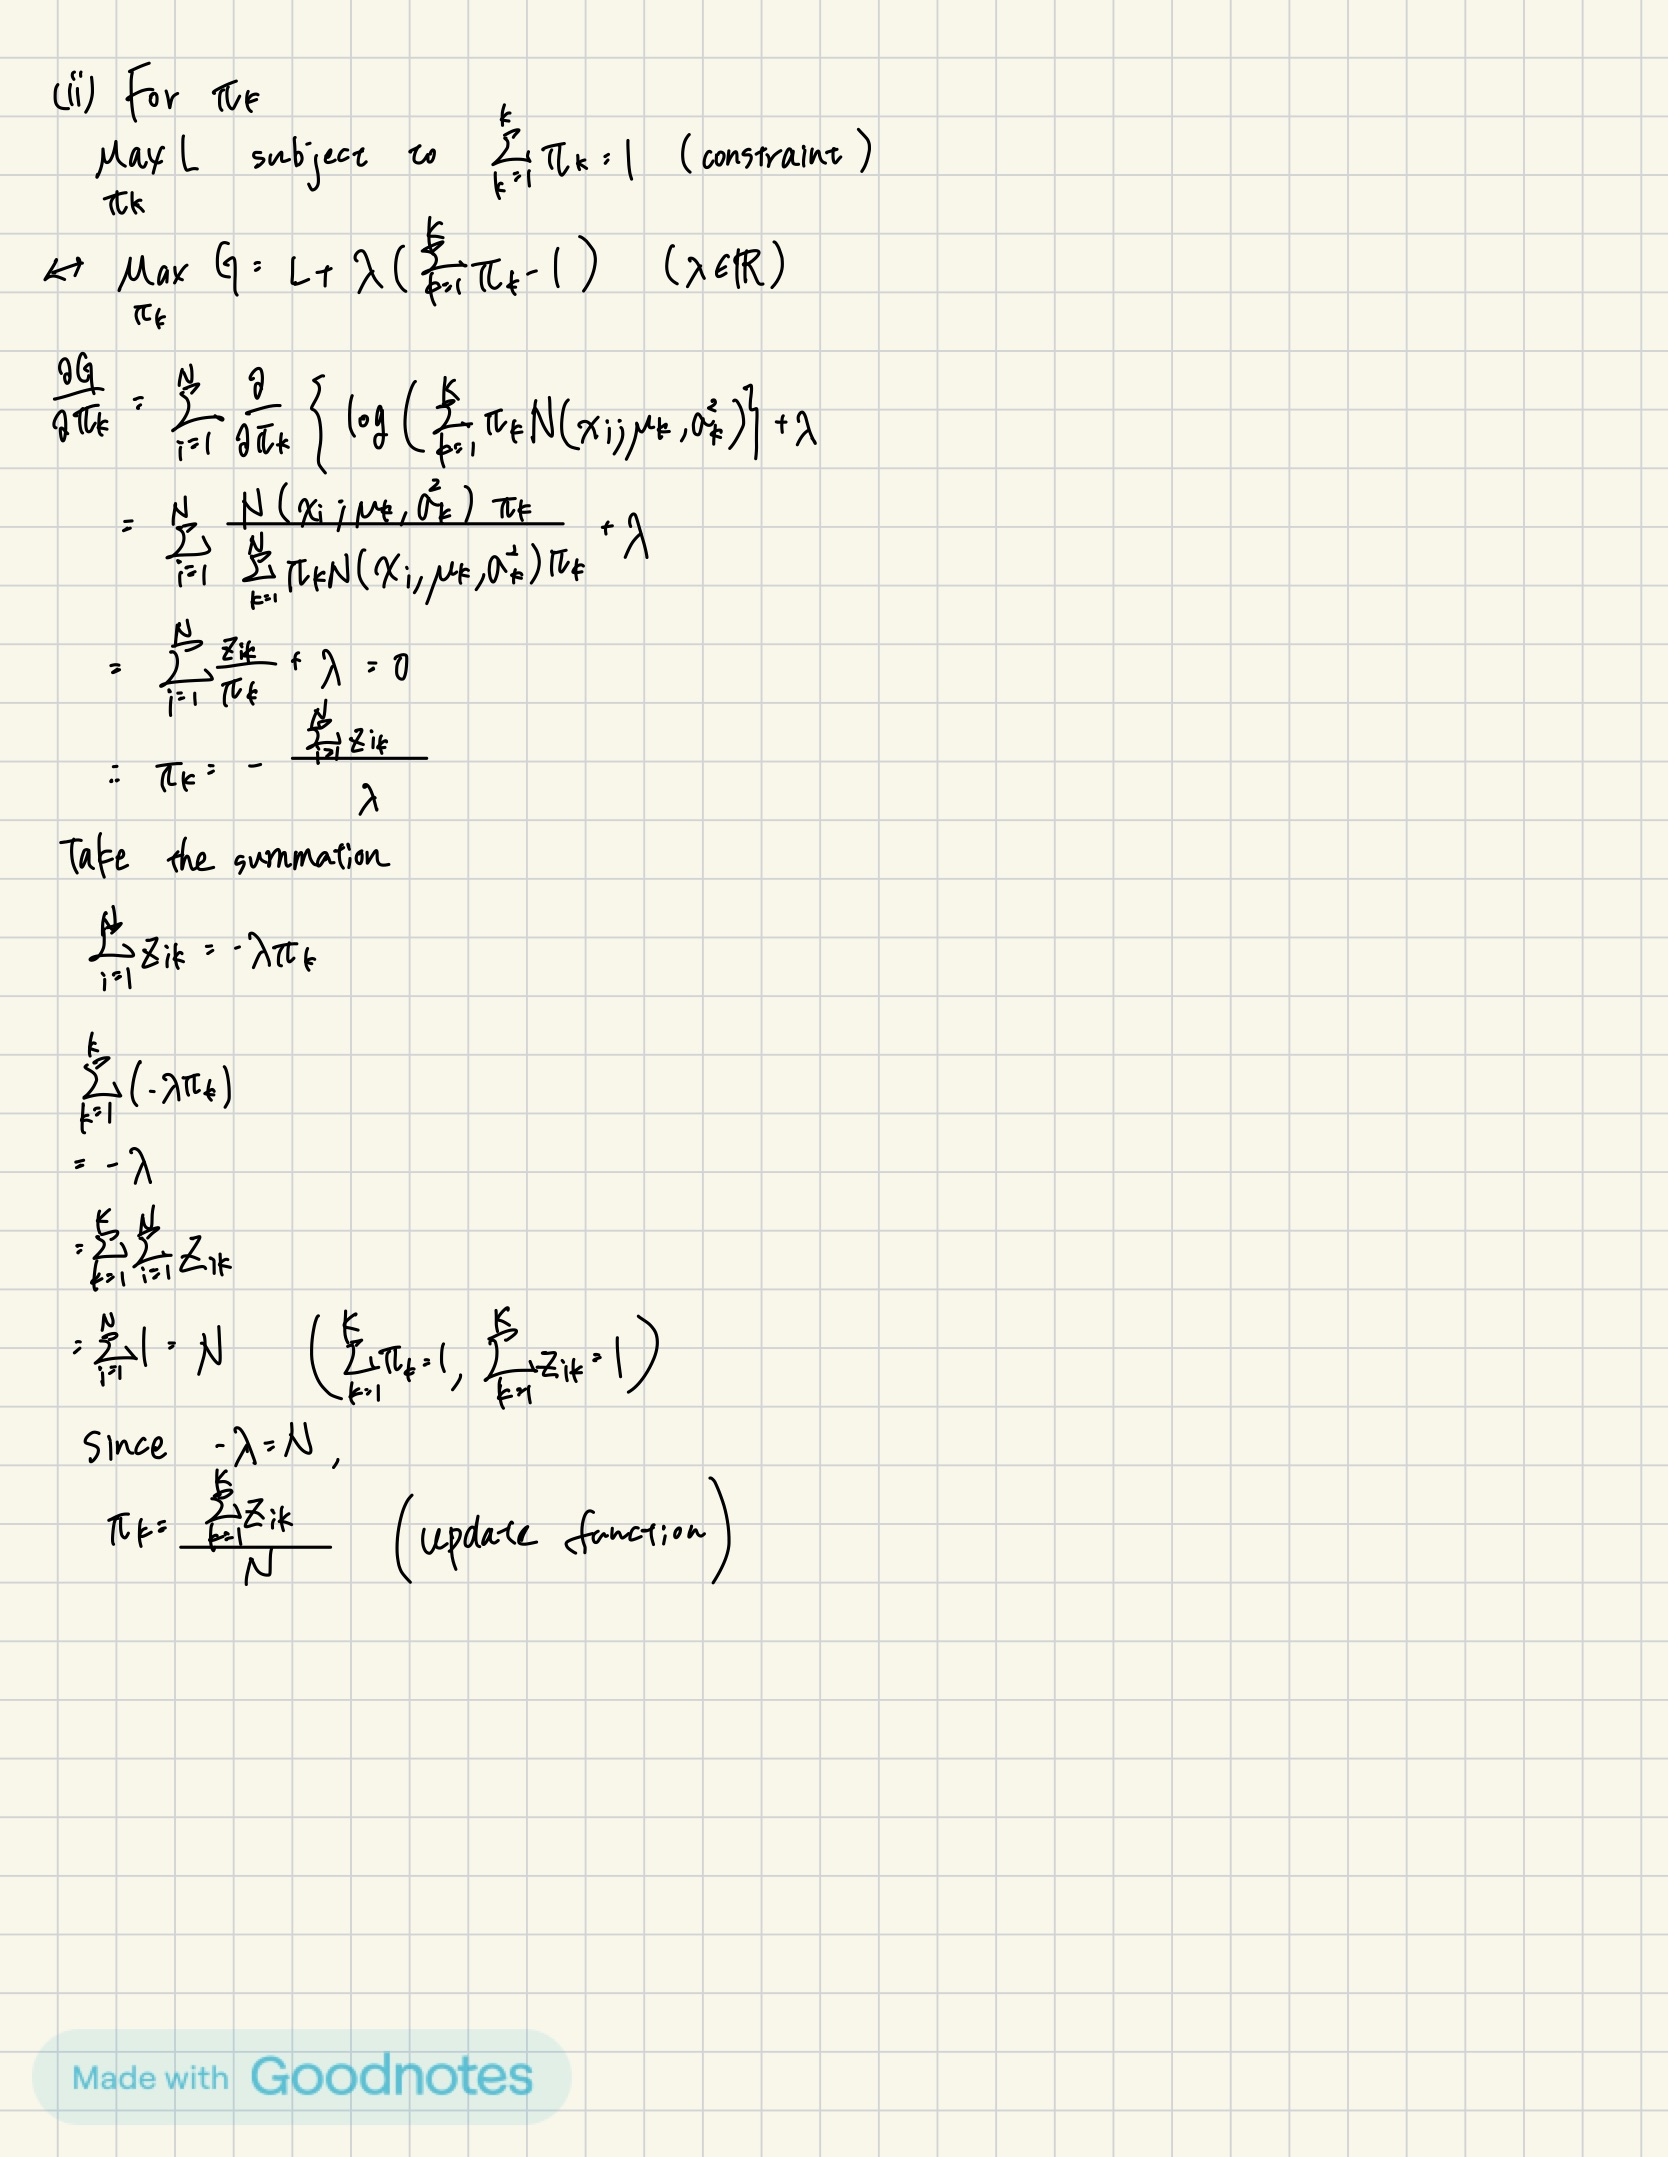

In [12]:
Image(filename='question1_2.jpg') 

# Question 2. (K-Means implementation, 25 pts)

#### **Question 2.1.** Implement K-means in Python from scratch. Complete following sub-functions `update_centroids` and `update_assignments`.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
def update_assignments(data, centroids):

  ########################
  #### YOUR CODE HERE ####
  ## you will get cluster# 
  ##assignments here #####
  k = np.shape(centroids)[0]
  assignment_list = []  
  for i in range(k):
    #calculate norm of the vector
    norm = np.linalg.norm(data-centroids[i], axis=1)
    assignment_list.append(norm)
  #minimum element of the array in the particular axis
  assignments = np.argmin(assignment_list, axis=0)
  #######################
  return assignments

def update_centroids(data,centroids,assignments):

  ########################
  #### YOUR CODE HERE ####
  k = np.shape(centroids)[0]
  new_centroids = []
  for i in range(k):
    new_centroids.append(data[assignments == i].mean(axis=0))
  new_centroids = np.array(new_centroids)
  ########################
  return new_centroids

def kmeans(data, centroids, max_iterations):    

    for j in range(max_iterations):
        # update cluter assignments
        assignments = update_assignments(data,centroids)    # WRITE CODE FOR update_assignments
        
        # update centroid locations
        centroids = update_centroids(data,centroids,assignments)  # WRITE CODE FOR update_centroids
        
    # final assignment update
    assignments = update_assignments(data,centroids)
    return centroids, assignments

#### **Question 2.2.** Run your code on following toy dataset for different k-values, where k = {2, 3, 4, 6, 10} and plot the cluster assignments for different k's as shown in following diagram.

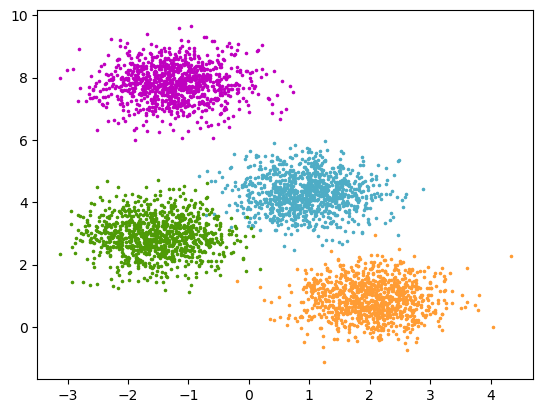

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)

colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

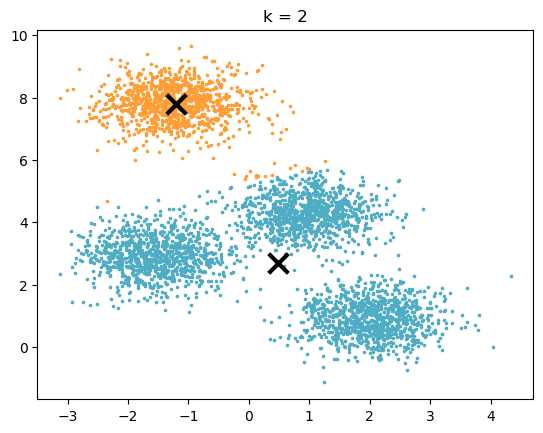

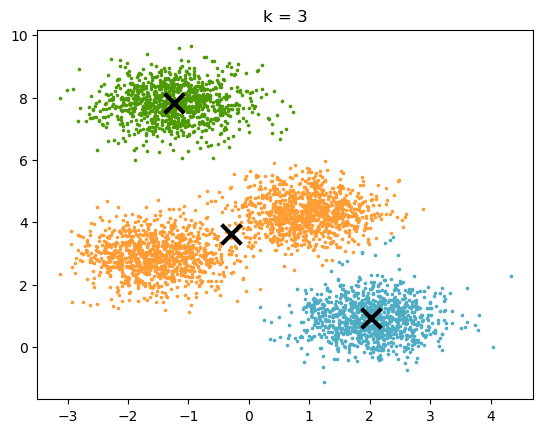

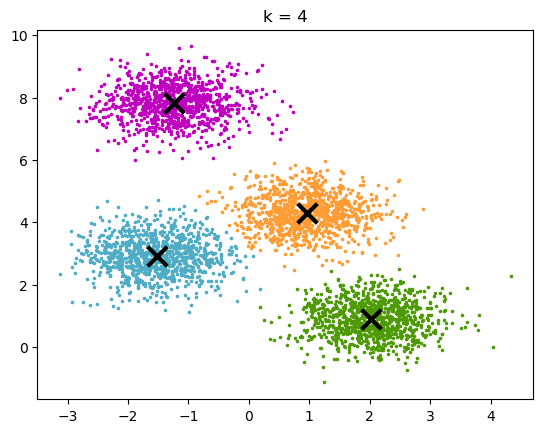

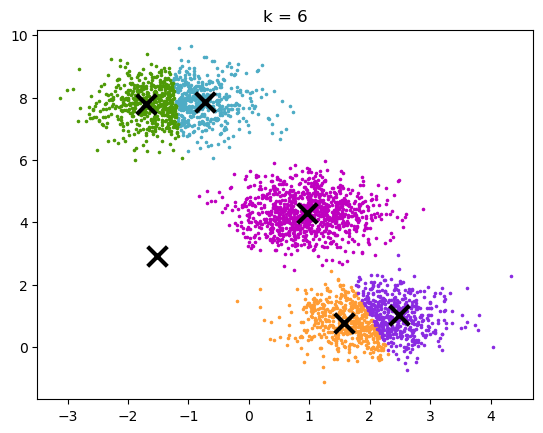

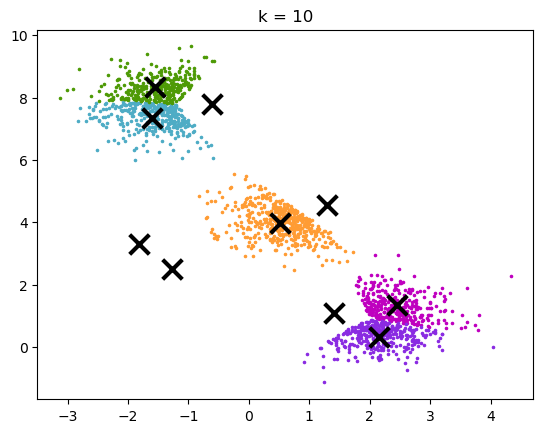

In [5]:

import numpy as np

# function to get initial cluster centroids; we randomly choose k points from the dataset 
def get_initial_clusters(k, X):
  random_indices = np.random.randint(0, X.shape[0], k)
  initial_centroids = X[random_indices]
  return initial_centroids
# your code here.
k_values = [2,3,4,6,10] 

for k in k_values:
  # initialize centroids
  initial_centroids = get_initial_clusters(k, X)
  # run k-means
  final_centroids, assignments = kmeans(X, initial_centroids, max_iterations = 300)

  # plot the results
  colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m", "#8A2BE2"]
  plt.figure()
  for i, col in enumerate(colors[:k]):
      cluster_data = assignments == i
      plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)

  # plot the centroids
  plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker="x", s=200, linewidths=3, color="k", zorder=10)
  plt.title("k = {}".format(k))
  plt.show()

# Question 3. (Kernel Methods with Noisy Setting, 75 pts)

**SVM on synthetic dataset generated as follows:**

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_+ = (1,1)$ and $\Sigma_+ = [1, 0; 0, 1]$ and label them as $+1$.

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_- = (-1,-1)$ and $\Sigma_- = [3, 0; 0, 3]$ and label them as $-1$.
    
- This gives you a $2000$ example training set. Repeat the above to draw a test set the same way.

Use a SVM package ( scikit-learn svm.SVC class) to learn SVMs with a variety of parameter settings. 

## (a -- 25 pts) 

- Use an RBF kernel with parameters $C=1$, $\gamma = 0.01$. 

- For each training data with +1 label, randomly flip their label to -1 with probability $\textbf{0.35}$.

- For each training data with -1 label, randomly flip their label to +1 with probability $\textbf{0.20}$.

- Train with the above noisy training examples.

- Random flipping introduces the randomness. You can repeat multiple times (e.g. 20) and then report the average accuracy on the testing dataset (clean) in the noise parameter setting. 



In [6]:
# Your code here
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# generate dataset for X
def generate_dataset(seed_data):
    np.random.seed(seed_data)
    
    dataset_number = 1000
    mean_positive = np.array([1,1])
    mean_negative = np.array([-1,-1])
    
    cov_positive = np.array([[1,0], [0,1]])
    cov_negative = np.array([[3,0], [0,3]])
    
    positive_dataset = np.random.multivariate_normal(mean_positive, cov_positive, dataset_number)
    negative_dataset = np.random.multivariate_normal(mean_negative, cov_negative, dataset_number)
    
    features = np.vstack((positive_dataset, negative_dataset))
    
    return features

# generate datatset for y
def generate_labels(seed_data, seed_flip, bool_flip):
    np.random.seed(seed_data)
    positive_labels = np.ones(1000)
    negative_labels = -1*np.ones(1000)
    
    if bool_flip:
        positive_labels = flip_label(positive_labels, 0.35, seed_flip)
        negative_labels = flip_label(negative_labels, 0.20, seed_flip)
    
    labels = np.hstack((positive_labels, negative_labels))
    return labels

# flip lables under its probability    
def flip_label(label, probability, seed_flip):
    np.random.seed(seed_flip)
    flipped_data = np.random.rand(1000) < probability
    label[flipped_data] = -1 * label[flipped_data]
    return label

# get accuracy
def get_accuracy(X_train, X_test, y_train, y_test):
    svm = SVC(kernel='rbf', C=1.0, gamma=0.01, random_state = 42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

accuracies = []
for i in range(20):
    X_train = generate_dataset(42)
    X_test = generate_dataset(24)
    y_train = generate_labels(42, i, True)
    y_test = generate_labels(24, 42, False)
    accuracies.append(get_accuracy(X_train, X_test, y_train, y_test))

print(f"The average of the accuracy is {np.mean(accuracies):.3f}")

The average of the accuracy is 0.806


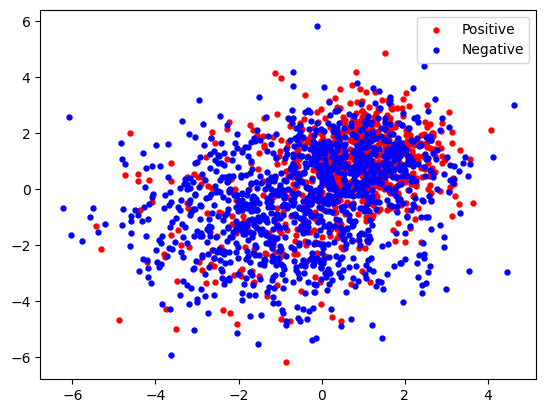

In [7]:
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c="r", marker=".", s=50, label="Positive")
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], c="b", marker=".", s=50, label = "Negative")
plt.legend()

## (b -- 25 pts) Open question

- Try using **K-Nearst Neighbors** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?


In [8]:
# Your code here

from sklearn.neighbors import KNeighborsClassifier

# Correct labels using k-Nearest Neighbors
def correct_labels_with_knn(X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, y_train)
    corrected_labels = knn.predict(X_train)
    return corrected_labels

accuracies_with_knn = []

for i in range(20):
    X_train = generate_dataset(42)
    X_test = generate_dataset(24)
    y_train = generate_labels(42, i, True)
    y_test = generate_labels(24, 42, False)
    
    # Correct labels with knn
    y_train = correct_labels_with_knn(X_train, y_train)
    accuracies_with_knn.append(get_accuracy(X_train, X_test, y_train, y_test))


print(f"Accuracy after using KNN for label correction: {np.mean(accuracies_with_knn):.3f}")


Accuracy after using KNN for label correction: 0.845


**Performance improvement was observed by using the K-Nearest Neighbors to correct wrong labels before training.**

## (c -- 25 pts) Open question

- Try using **clustering (i.e., K-means, EM-clustering)** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?

In [9]:
# Your code here
from sklearn.cluster import KMeans

# Function to correct labels using K-means clustering
def correct_labels_with_kmeans(X_train):
    kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
    kmeans.fit(X_train)
    y_train_corrected = kmeans.predict(X_train)    
    return y_train_corrected
    
accuracies_with_kmeans = []

for i in range(20):
    X_train = generate_dataset(42)
    X_test = generate_dataset(24)
    y_train = generate_labels(42, i, True)
    y_test = generate_labels(24, 42, False)
    
    # Correct labels with K-means
    y_train = correct_labels_with_kmeans(X_train)
    accuracies_with_kmeans.append(get_accuracy(X_train, X_test, y_train, y_test))
    
print(f"Accuracy with K-means corrected labels: {np.mean(accuracies_with_kmeans):.3f}")

Accuracy with K-means corrected labels: 0.017


**The performance got worse when K-means was used before training.**